# Cogs 118C, Spring 2020


## HW3

Name: Malachi Mabie

Student ID: A15737533

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal

# 1. Convolution Theorem

_For each left signal, choose the right signal convolution._

    1. A -> W
    2. B -> Y
    3. D -> X
    4. C -> Z


# 2. Signal Transformation Classification

_For each of the following signal transformations, state whether it is (a) linear, (b) time-invariant, (c) both linear and time-invariant (LTI), or (d) neither linear nor time-invariant._

    a. (C) linear and time-invariant
    b. (C) LTI
    c. (A) linear
    d. (D) neither linear nor time-invariant
    e. (B) time-invariant
    f. (B) time-invariant
    g. (C) LTI



# 3. Power Spectral Estimates

In [3]:
# the csv contains a few seconds of EEG data recorded from a rat performing a reward learning task.
# col 1 = time, col 2 = voltage in microvolts

EEG_df = pd.read_csv('HW3_Cogs118C_eeg.csv', sep=',')
EEG_df.head()


,Time,EEG
0,0.000,55.681915
1,0.002,-54.693130
2,0.004,-41.902405
3,0.006,33.800045
4,0.008,125.065987


In [4]:
# a)
Fs = 500 #Hz
T = EEG_df.size / Fs
print(Fs, "Hz, ", T, "s")

500 Hz,  19.996 s


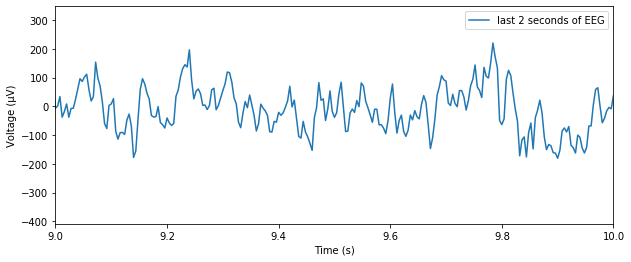

In [5]:
# b) plot t=[9,10]

t = EEG_df["Time"]
t = np.arange(0, T, .004)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, EEG_df["EEG"], label=r"last 2 seconds of EEG")
ax.legend()

plt.xlim(9,10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.show()

Text(0.5, 0, 'Frequency (Hz)')

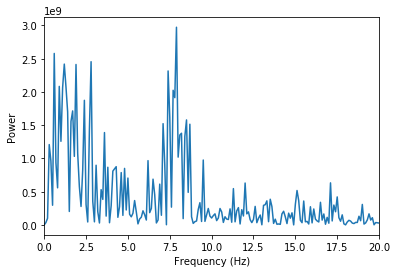

In [8]:
# c) calculate periodogram & plot power vs frequency[0,20Hz]
periodogram = scipy.signal.periodogram(x=EEG_df["EEG"], fs=Fs)

FFT = np.fft.fft(EEG_df["EEG"])

power = np.fft.fftshift(np.abs(FFT)**2)
freq = np.fft.fftshift(np.fft.fftfreq(4999,1/500))

plt.xlim(0,20)
plt.plot(freq,power)

plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")




### d) Would the irregular fluctuations be reduced if we started with a longer recording?
    Over time, I agree that the core frequencies would become clearer with a longer recording,
    because there would be more samples that hit the popular frequencies relative to the noise frequencies,
    and power is not a linear function.

Text(0.5, 0, 'Frequency (Hz)')

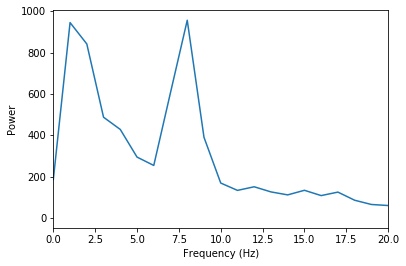

In [10]:
# e) use Welch's method to estimate the power spectrum.
welch = scipy.signal.welch(x=EEG_df["EEG"],fs=Fs,nperseg=500, )

plt.xlim(0,20)
plt.plot(welch[1])

plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")


### f) Frequency Resolution
    The frequency resolution is 1 Hertz.

### g) Explain why Welch's method gives a smoother estimate
    By using binning rather than raw data, it is easier to pinpoint what the significant peaks
    of the data are with Welch's method.

### h) What value of nperseg would give deltaf = 0.25 Hz?
    Our resolution is 1/500, so using nperseg=125 we would get 0.25Hz frequency bins.

    The resulting spectral estimate would be more noisy, since there would be
    more peaks of noise that could rear their heads.

In [19]:
x = np.array([1,0,0,0])
np.fft.fft(x)

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])